In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
!unzip '/content/drive/MyDrive/Data-Science Edureka/Project/Animals - 10/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [3]:
BATCH_SIZE = 100
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 10

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/raw-img",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 26179 files belonging to 10 classes.


In [5]:
class_names = dataset.class_names
class_names

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [6]:
traslate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel"}

(100, 256, 256, 3)
[2 0 2 3 7 0 7 0 9 0 0 2 0 0 2 8 7 8 5 3 2 3 3 3 0 6 3 3 8 4 9 3 4 3 8 3 7
 8 8 0 4 1 0 0 1 7 0 7 0 7 7 2 9 3 0 0 8 8 5 4 6 4 6 2 2 2 1 7 3 8 1 4 3 9
 4 8 4 8 4 5 5 1 3 0 2 3 8 8 0 3 4 6 0 1 4 4 8 8 8 2]


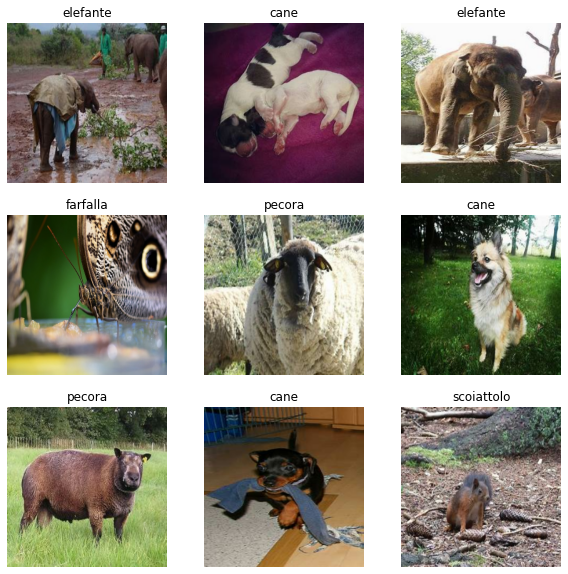

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(0,9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

In [8]:
def get_dataset_partitions_tf(ds, train_split=0.9, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    test_size = int(test_split * ds_size)
    
    train_ds = ds.take(train_size)    
    test_ds = ds.skip(test_size)
    
    return train_ds, test_ds

In [9]:
train_ds, test_ds = get_dataset_partitions_tf(dataset)

In [10]:
# dataset = dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [13]:
# input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# n_classes = 10

# model = models.Sequential([
#     resize_and_rescale,
#     # data_augmentation,
#     layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape, padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64,  kernel_size = (3,3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128,  kernel_size = (3,3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256,  (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.1),
#     layers.Dense(500, activation='relu'),
#     layers.Dropout(0.1),
#     layers.Dense(n_classes, activation='softmax')
# ])

# model.build(input_shape=input_shape)

In [14]:
# model.summary()

In [15]:
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy']
# )

In [16]:
from tensorflow import keras

In [17]:
# input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# model = keras.models.Sequential([
#     resize_and_rescale,
#     keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#     keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#     keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(4096, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(10, activation='softmax')
# ])

# model.build(input_shape=input_shape)

In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)
model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape=input_shape)

In [19]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [20]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=['accuracy'])
# model.summary()

In [21]:
# history = model.fit(
#     train_ds,
#     batch_size=BATCH_SIZE,
#     verbose=1,
#     epochs=EPOCHS
# )

In [22]:
# model.fit(dataset,
#           epochs=10)
#           # validation_data=validation_ds,
#           # validation_freq=1,
#           # callbacks=[tensorboard_cb])

In [23]:
history = model.fit(
    dataset,
    epochs = 40,
    verbose=2,
    batch_size = BATCH_SIZE,
)

Epoch 1/40
262/262 - 80s - loss: 2.0016 - accuracy: 0.2899 - 80s/epoch - 307ms/step
Epoch 2/40
262/262 - 60s - loss: 1.6052 - accuracy: 0.4434 - 60s/epoch - 228ms/step
Epoch 3/40
262/262 - 61s - loss: 1.3751 - accuracy: 0.5290 - 61s/epoch - 233ms/step
Epoch 4/40
262/262 - 61s - loss: 1.2250 - accuracy: 0.5873 - 61s/epoch - 234ms/step
Epoch 5/40
262/262 - 60s - loss: 1.1129 - accuracy: 0.6214 - 60s/epoch - 228ms/step
Epoch 6/40
262/262 - 61s - loss: 1.0305 - accuracy: 0.6484 - 61s/epoch - 233ms/step
Epoch 7/40
262/262 - 60s - loss: 0.9565 - accuracy: 0.6756 - 60s/epoch - 227ms/step
Epoch 8/40
262/262 - 61s - loss: 0.8895 - accuracy: 0.7001 - 61s/epoch - 234ms/step
Epoch 9/40
262/262 - 60s - loss: 0.8337 - accuracy: 0.7168 - 60s/epoch - 230ms/step
Epoch 10/40
262/262 - 60s - loss: 0.7835 - accuracy: 0.7336 - 60s/epoch - 230ms/step
Epoch 11/40
262/262 - 60s - loss: 0.7384 - accuracy: 0.7509 - 60s/epoch - 230ms/step
Epoch 12/40
262/262 - 61s - loss: 0.6893 - accuracy: 0.7682 - 61s/epoch - 

In [24]:
model_json = model.to_json()
with open("Animal_10.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("Animal_10.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image
 
ImagePath= '/content/raw-img/scoiattolo/OIP--9CxJkCleiNXywWpQhEUDAHaE7.jpeg'
test_image=image.load_img(ImagePath,target_size=(256, 256))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result= model.predict(test_image,verbose=0)

# print(training_set.class_indices)
 
print('####'*10)

print(np.argmax(result))
print('Prediction is: ',traslate[class_names[np.argmax(result)]])

########################################
9
Prediction is:  squirrel


In [25]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image
 
ImagePath= '/content/raw-img/cane/OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg'
test_image=image.load_img(ImagePath,target_size=(256, 256))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result= model.predict(test_image,verbose=0)

# print(training_set.class_indices)
 
print('####'*10)

print(np.argmax(result))
print('Prediction is: ',traslate[class_names[np.argmax(result)]])

########################################
0
Prediction is:  dog


In [ ]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image
 
ImagePath= '/content/raw-img/farfalla/OIP--CDKKVE9j_HyFGxf8DAV7wHaJQ.jpeg'
test_image=image.load_img(ImagePath,target_size=(256, 256))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result= model.predict(test_image,verbose=0)

# print(training_set.class_indices)
 
print('####'*10)

print(np.argmax(result))
print('Prediction is: ',traslate[class_names[np.argmax(result)]])

########################################
3
Prediction is:  butterfly


In [26]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image
 
ImagePath= '/content/drive/MyDrive/Data-Science Edureka/Project/Animals - 10/butterfly.jpg'
test_image=image.load_img(ImagePath,target_size=(256, 256))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result= model.predict(test_image,verbose=0)

# print(training_set.class_indices)
 
print('####'*10)

print(np.argmax(result))
print('Prediction is: ',traslate[class_names[np.argmax(result)]])

########################################
3
Prediction is:  butterfly


In [27]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image
 
ImagePath= '/content/drive/MyDrive/Data-Science Edureka/Project/Animals - 10/cow.jpg'
test_image=image.load_img(ImagePath,target_size=(256, 256))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result= model.predict(test_image,verbose=0)

# print(training_set.class_indices)
 
print('####'*10)

print(np.argmax(result))
print('Prediction is: ',traslate[class_names[np.argmax(result)]])

########################################
6
Prediction is:  cow


In [28]:
'''########### Making single predictions ###########'''
import numpy as np
from tensorflow.keras.preprocessing import image
 
ImagePath= '/content/drive/MyDrive/Data-Science Edureka/Project/Animals - 10/squirrel.jpg'
test_image=image.load_img(ImagePath,target_size=(256, 256))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result= model.predict(test_image,verbose=0)

# print(training_set.class_indices)
 
print('####'*10)

print(np.argmax(result))
print('Prediction is: ',traslate[class_names[np.argmax(result)]])

########################################
9
Prediction is:  squirrel
